In [29]:
import sys
sys.path.append('../..')

from model.amm.stableswap_amm import StableSwapPoolState
import matplotlib.pyplot as plt


In [30]:
# oct 13 price was 1.13
# jan 13 price was 1.42
# 92 days
init_vDOT_price = 1.13
final_price = 1.42
t = 92
fee = 0.0
amp = 100
tokens = {'DOT': init_vDOT_price * 1000000, 'vDOT': 1000000}
pool = StableSwapPoolState(tokens, amp, trade_fee=fee, peg=init_vDOT_price)
print(pool.spot_price(1))
print(pool.sell_spot("DOT", "vDOT", 1000))
spot_prices = [pool.spot_price(1)]
step_size = (final_price - init_vDOT_price) / t
pegs = [init_vDOT_price + i * step_size for i in range(t+1)]
for i in range(92):
    pool.set_peg(pegs[i+1])
    spot_prices.append(pool.spot_price(1))

# print(pegs[-1])
# print(spot_prices[0:10])
# print(pegs[0:10])

1.0012182103298009
-997.784488629037


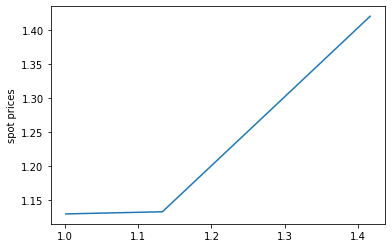

In [31]:
# Create the plot
plt.plot(spot_prices, pegs)

# Add labels and a title
# plt.xlabel('X-axis Label')
plt.ylabel('spot prices')
# plt.title('Basic Plot Example')

# Show the plot
plt.show()